Formula 1 exploration

In [25]:
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import confusion_matrix


In [3]:
import os
fnames = []
fpaths = []
for dirname, _ , filenames in os.walk('data'):
    for filename in filenames:
        fnames.append(filename.split('.')[0])
        fpaths.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

data\circuits.csv
data\constructors.csv
data\constructor_results.csv
data\constructor_standings.csv
data\drivers.csv
data\driver_standings.csv
data\final_merge.csv
data\lap_times.csv
data\pit_stops.csv
data\qualifying.csv
data\races.csv
data\results.csv
data\seasons.csv
data\sprint_results.csv
data\status.csv


In [4]:
fpath = 'data/'
circuits = pd.read_csv(f'{fpath}circuits.csv', index_col=0, na_values=r'\N')
constructorResults = pd.read_csv(f'{fpath}constructor_results.csv', index_col=0, na_values=r'\N')
constructors = pd.read_csv(f'{fpath}constructors.csv', index_col=0, na_values=r'\N')
constructorStandings = pd.read_csv(f'{fpath}constructor_standings.csv', index_col=0, na_values=r'\N')
drivers = pd.read_csv(f'{fpath}drivers.csv', index_col=0, na_values=r'\N')
driverStandings = pd.read_csv(f'{fpath}driver_standings.csv', index_col=0, na_values=r'\N')
lapTimes = pd.read_csv(f'{fpath}lap_times.csv')
pitStops = pd.read_csv(f'{fpath}pit_stops.csv')
qualifying = pd.read_csv(f'{fpath}qualifying.csv', index_col=0, na_values=r'\N')
races = pd.read_csv(f'{fpath}races.csv', na_values=r'\N')
results = pd.read_csv(f'{fpath}results.csv', index_col=0, na_values=r'\N')
seasons = pd.read_csv(f'{fpath}seasons.csv', index_col=0, na_values=r'\N')
status = pd.read_csv(f'{fpath}status.csv', index_col=0, na_values=r'\N')

races.drop(['fp1_date','fp3_date','fp2_date','fp1_time','fp3_time','fp2_time','quali_date','quali_time','sprint_date','sprint_time'], axis = 1, inplace = True)
circuits = circuits.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
qualifying.rename(columns = {'grid_position': 'grid'}, inplace = True)
constructors = constructors.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})
races.set_index('raceId',inplace=True)
races['date'] = races['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
pitStops = pitStops.rename(columns={'time':'pitTime'})
pitStops['seconds'] = pitStops['milliseconds'].apply(lambda x: x/1000)
results['seconds'] = results['milliseconds'].apply(lambda x: x/1000)

In [5]:
resultsAnalysis = pd.merge(results,races,left_on='raceId',right_on='raceId',how='left')
resultsAnalysis = pd.merge(resultsAnalysis,circuits,left_on='circuitId',right_index=True,how='left')
resultsAnalysis = pd.merge(resultsAnalysis,constructors,left_on='constructorId',right_index=True,how='left')
resultsAnalysis = pd.merge(resultsAnalysis,drivers,left_on='driverId',right_index=True,how='left')
resultsAnalysis.head()
constructor_color_map = {
    'Toro Rosso':'#0000FF',
    'Mercedes':'#6CD3BF',
    'Red Bull':'#1E5BC6',
    'Ferrari':'#ED1C24',
    'Williams':'#37BEDD',
    'Force India':'#FF80C7',
    'Virgin':'#c82e37',
    'Renault':'#FFD800',
    'McLaren':'#F58020',
    'Sauber':'#006EFF',
    'Lotus':'#FFB800',
    'HRT':'#b2945e',
    'Caterham':'#0b361f',
    'Lotus F1':'#FFB800',
    'Marussia':'#6E0000',
    'Manor Marussia':'#6E0000',
    'Haas F1 Team':'#B6BABD',
    'Racing Point':'#F596C8',
    'Aston Martin':'#2D826D',
    'Alfa Romeo':'#B12039',
    'AlphaTauri':'#4E7C9B',
    'Alpine F1 Team':'#2293D1'
}

In [6]:
lapTimesAnalysis = pd.merge(lapTimes,races,left_on='raceId',right_on='raceId',how='left')
lapTimesAnalysis = pd.merge(lapTimesAnalysis,resultsAnalysis,left_on=['raceId','driverId','year','round','circuitId','name','url'],right_on=['raceId','driverId','year','round','circuitId','name','url'],how='left')
lapTimesAnalysis.head()



,raceId,driverId,lap,position_x,time_x_x,milliseconds_x,year,round,circuitId,name,...,constructorUrl,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,841,20,1,1,1:38.109,98109,2011,1,1,Australian Grand Prix,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel
1,841,20,2,1,1:33.006,93006,2011,1,1,Australian Grand Prix,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel
2,841,20,3,1,1:32.713,92713,2011,1,1,Australian Grand Prix,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel
3,841,20,4,1,1:32.803,92803,2011,1,1,Australian Grand Prix,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel
4,841,20,5,1,1:32.342,92342,2011,1,1,Australian Grand Prix,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel


## Lap time in years

In [7]:
circuitName = lapTimesAnalysis['circuitName'].unique()[10]
lapTimesAnalysis['lapSeconds'] = lapTimesAnalysis['milliseconds_x'].apply(lambda x: x/1000)
df = lapTimesAnalysis[(lapTimesAnalysis['circuitName']==circuitName)].groupby(by=['year','constructorName']).mean().reset_index()

fig = px.line(
    df,
    x='year',
    y='lapSeconds',
    color='constructorName',
    color_discrete_map=constructor_color_map,
)

fig.update_layout(
    title_text=f'Lap Time Trend by Constructor - {circuitName}',
)

fig.update_traces(opacity=0.65)
fig.show()


Lap times by circuit


In [8]:
year = 2021
circuitName = lapTimesAnalysis['circuitName'].unique()[5]
driverList = lapTimesAnalysis[(lapTimesAnalysis['year']==year)]['driverName'].unique()
df = lapTimesAnalysis[(lapTimesAnalysis['year']==year)&(lapTimesAnalysis['driverName'].isin(driverList))].groupby(by=['circuitName','year','driverName']).mean().reset_index().sort_values(by='raceId')[['year','lap','lapSeconds','driverName','circuitName']]

fig = px.line(
    data_frame = df,
    x='circuitName',
    y='lapSeconds',
    color='driverName',
)

fig.update_layout(
    title_text=f'Average Lap Times by Circuit - {year}',
)
fig.show()

In [9]:
qualifying.head()

,raceId,driverId,constructorId,number,position,q1,q2,q3
qualifyId,,,,,,,,
1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


### Regression


In [10]:



df2 = pd.merge(races, results, how='inner', on=['raceId']).drop(['url','points'], axis = 1)
df3 = pd.merge(df2, driverStandings, how='right', on=['raceId', 'driverId', 'position']) 
df3
df4 = pd.merge(df3, constructorStandings, how='left', on=['raceId', 'constructorId']) #from 1958
final_df = pd.merge(df4, qualifying, how='inner', on=['raceId', 'driverId']) #from 1983

final_df.head()


,raceId,year,round,circuitId,name,date,time_x,driverId,constructorId_x,number_x,...,points_y,position_y,positionText,wins_y,constructorId_y,number_y,position,q1,q2,q3
0,18,2008.0,1.0,1.0,Australian Grand Prix,2008-03-16,04:30:00,1,1.0,22.0,...,14.0,1.0,1,1.0,1,22,1,1:26.572,1:25.187,1:26.714
1,18,2008.0,1.0,1.0,Australian Grand Prix,2008-03-16,04:30:00,2,2.0,3.0,...,8.0,3.0,3,0.0,2,3,5,1:25.960,1:25.518,1:27.236
2,18,2008.0,1.0,1.0,Australian Grand Prix,2008-03-16,04:30:00,3,3.0,7.0,...,9.0,2.0,2,0.0,3,7,7,1:26.295,1:26.059,1:28.687
3,18,2008.0,1.0,1.0,Australian Grand Prix,2008-03-16,04:30:00,4,4.0,5.0,...,5.0,4.0,4,0.0,4,5,12,1:26.907,1:26.188,NaN
4,18,2008.0,1.0,1.0,Australian Grand Prix,2008-03-16,04:30:00,5,1.0,23.0,...,14.0,1.0,1,1.0,1,23,3,1:25.664,1:25.452,1:27.079


In [11]:
## Using final Data
df = pd.read_csv('data/final_merge.csv')
np.set_printoptions(precision=4)
comparison_dict ={'model':[],
                  'params': [],
                  'score': []}
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

np.set_printoptions(precision=4)


In [12]:
train = df[df.season <2019]
X_train = train.drop(['driver', 'podium'], axis = 1)
y_train = train.podium

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

def score_regression(model):
    score = 0
    for circuit in df[df.season == 2019]['round'].unique():

        test = df[(df.season == 2019) & (df['round'] == circuit)]
        X_test = test.drop(['driver', 'podium'], axis = 1)
        y_test = test.podium

        #scaling
        X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

        # make predictions
        prediction_df = pd.DataFrame(model.predict(X_test), columns = ['results'])
        prediction_df['podium'] = y_test.reset_index(drop = True)
        prediction_df['actual'] = prediction_df.podium.map(lambda x: 1 if x == 1 else 0)
        prediction_df.sort_values('results', ascending = True, inplace = True)
        prediction_df.reset_index(inplace = True, drop = True)
        prediction_df['predicted'] = prediction_df.index
        prediction_df['predicted'] = prediction_df.predicted.map(lambda x: 1 if x == 0 else 0)

        score += precision_score(prediction_df.actual, prediction_df.predicted)

    model_score = score / df[df.season == 2019]['round'].unique().max()
    return model_score

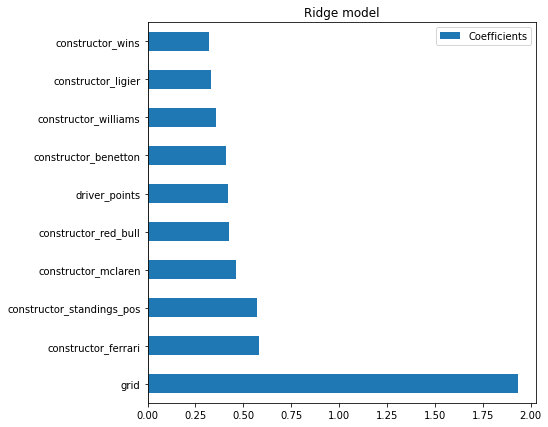

In [13]:
# Linear Regression

params={'fit_intercept': ['True', 'False']}

for fit_intercept in params['fit_intercept']:
    model_params = (fit_intercept)
    model = LinearRegression(fit_intercept = fit_intercept)
    model.fit(X_train, y_train)
            
    model_score = score_regression(model)
            
    comparison_dict['model'].append('linear_regression')
    comparison_dict['params'].append(model_params)
    comparison_dict['score'].append(model_score)

coefs = pd.DataFrame(
   abs(model.coef_),
   columns=['Coefficients'], index=X_train.columns
)
coefs = coefs.nlargest(10,'Coefficients')
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [14]:
# Neural network

# params={'hidden_layer_sizes': [(80,20,40,5), (75,30,50,10,3)], 
#         'activation': ['identity', 'relu','logistic', 'tanh',], 
#         'solver': ['lbfgs','sgd', 'adam'], 
#         'alpha': np.logspace(-4,1,20)} 
# params ={'hidden_layer_sizes':[(75,25,50,10)],
#     'activation': ['identity'],
#     'solver':['lbfgs'],
#     'alpha': [0.016]}

# for hidden_layer_sizes in params['hidden_layer_sizes']:
#     for activation in params['activation']:
#         for solver in params['solver']:
#             for alpha in params['alpha']:
#                 model_params = (hidden_layer_sizes, activation, solver, alpha )
#                 model = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes,
#                                       activation = activation, solver = solver, alpha = alpha, random_state = 1)
#                 model.fit(X_train, y_train)

#                 model_score = score_regression(model)

#                 comparison_dict['model'].append('nn_regressor')
#                 comparison_dict['params'].append(model_params)
#                 comparison_dict['score'].append(model_score)

In [15]:
pd.DataFrame(comparison_dict).groupby('model')['score'].max()

model
linear_regression    0.47619
Name: score, dtype: float64

Classification


In [26]:

df.podium = df.podium.map(lambda x: 1 if x == 1 else 0)

#split train

train = df[df.season <2019]
X_train = train.drop(['driver', 'podium'], axis = 1)
y_train = train.podium

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# scoring function for classification
def score_classification(model):
    score = 0
    for circuit in df[df.season == 2019]['round'].unique():

        test = df[(df.season == 2019) & (df['round'] == circuit)]
        X_test = test.drop(['driver', 'podium'], axis = 1)
        y_test = test.podium

        #scaling
        X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

        # make predictions
        prediction_df = pd.DataFrame(model.predict_proba(X_test), columns = ['proba_0', 'proba_1'])
        prediction_df['actual'] = y_test.reset_index(drop = True)
        prediction_df.sort_values('proba_1', ascending = False, inplace = True)
        prediction_df.reset_index(inplace = True, drop = True)
        prediction_df['predicted'] = prediction_df.index
        prediction_df['predicted'] = prediction_df.predicted.map(lambda x: 1 if x == 0 else 0)
        print(prediction_df.actual)
        score += precision_score(prediction_df.actual, prediction_df.predicted)

        

    model_score = score / df[df.season == 2019]['round'].unique().max()
        
    return model_score
# gridsearch dictionary

comparison_dict ={'model':[],
                  'params': [],
                  'score': []}

# Logistic Regression

# params={'penalty': ['l1', 'l2'],
#         'solver': ['saga', 'liblinear'],
#         'C': np.logspace(-3,1,20)}

# for penalty in params['penalty']:
#     for solver in params['solver']:
#         for c in params['C']:
#             model_params = (penalty, solver, c)
#             model = LogisticRegression(penalty = penalty, solver = solver, C = c, max_iter = 10000)
#             model.fit(X_train, y_train)
            
#             model_score = score_classification(model)
            
#             comparison_dict['model'].append('logistic_regression')
#             comparison_dict['params'].append(model_params)
#             comparison_dict['score'].append(model_score)

# # Random Forest Classifier

# params={'criterion': ['gini', 'entropy'],
#         'max_features': [0.8, 'auto', None],
#         'max_depth': list(np.linspace(5, 55, 26)) + [None]}

# for criterion in params['criterion']:
#     for max_features in params['max_features']:
#         for max_depth in params['max_depth']:
#             model_params = (criterion, max_features, max_depth)
#             model = RandomForestClassifier(criterion = criterion, max_features = max_features, max_depth = max_depth)
#             model.fit(X_train, y_train)
            
#             model_score = score_classification(model)
            
#             comparison_dict['model'].append('random_forest_classifier')
#             comparison_dict['params'].append(model_params)
#             comparison_dict['score'].append(model_score)

# Support Vector Machines

# params={'gamma': np.logspace(-4, -1, 20),
#         'C': np.logspace(-2, 1, 20),
#         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

# for gamma in params['gamma']:
#     for c in params['C']:
#         for kernel in params['kernel']:
#             model_params = (gamma, c, kernel)
#             model = svm.SVC(probability = True, gamma = gamma, C = c, kernel = kernel )
#             model.fit(X_train, y_train)
            
#             model_score = score_classification(model)
            
#             comparison_dict['model'].append('svm_classifier')
#             comparison_dict['params'].append(model_params)
#             comparison_dict['score'].append(model_score)

# Neural network

# params={'hidden_layer_sizes': [(80,20,40,5), (75,25,50,10)], 
#         'activation': ['identity', 'logistic', 'tanh', 'relu'], 
#         'solver': ['lbfgs', 'sgd', 'adam', 'logistic'], 
#         'alpha': np.logspace(-4,2,20)} 

# for hidden_layer_sizes in params['hidden_layer_sizes']:
#     for activation in params['activation']:
#         for solver in params['solver']:
#             for alpha in params['alpha']:
#                 model_params = (hidden_layer_sizes, activation, solver, alpha )
#                 model = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes,
#                                       activation = activation, solver = solver, alpha = alpha, random_state = 1)
#                 model.fit(X_train, y_train)

#                 model_score = score_classification(model)

#                 comparison_dict['model'].append('neural_network_classifier')
#                 comparison_dict['params'].append(model_params)
#                 comparison_dict['score'].append(model_score)
params ={'hidden_layer_sizes':[(75,25,50,10)],
    'activation': ['identity'],
    'solver':['lbfgs'],
    'alpha': [0.016]}

for hidden_layer_sizes in params['hidden_layer_sizes']:
    for activation in params['activation']:
        for solver in params['solver']:
            for alpha in params['alpha']:
                model_params = (hidden_layer_sizes, activation, solver, alpha )
                model = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes,
                                      activation = activation, solver = solver, alpha = alpha, random_state = 1)
                model.fit(X_train, y_train)

                model_score = score_classification(model)

                comparison_dict['model'].append('neural_network_classifier')
                comparison_dict['params'].append(model_params)
                comparison_dict['score'].append(model_score)
            

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: actual, dtype: int64
0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: actual, dtype: int64
0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
Name: actual, dtype: int64
0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
Name: actual, dtype: int64
0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
Name: actual, dtype: int64
0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
1

In [17]:
comparison_dict
model

MLPClassifier(activation='identity', alpha=0.016,
              hidden_layer_sizes=(75, 25, 50, 10), random_state=1,
              solver='lbfgs')

NameError: name 'prediction_df' is not defined